In [0]:
import six.moves.cPickle as Pickle
import glob
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


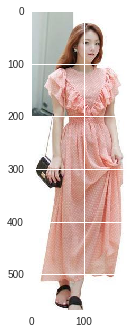

In [0]:
##Dont run ==Sample image color changing cell

file = '/content/drive/My Drive/Colab Notebooks/ViewU/PID000000_CLEAN0_IID000000.jpg'
img = cv2.imread(file)
#img = cv2.imread(file,0) ##Gray scale
#img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) ##YCrCb color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  ##HSV color space
#img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  ##LAB color space
#img = cv2.Laplacian(img, cv2.CV_64F)
#plt.imshow(img, cmap ='hot')
#plt.imshow(img, cmap ='nipy_spectral')
plt.imshow(img)
plt.show()

In [0]:
dataset_dir = '/content/drive/My Drive/Colab Notebooks/ViewU/'
models = []
clothes = []
users = []

In [4]:
for filename in os.listdir(dataset_dir):
  #print(filename)
  if(filename.endswith('.jpg') or filename.endswith('.png')):
    if filename.split('_')[1].endswith('0'):
      models.append(filename)
    elif filename.split('_')[1].endswith('2'):
      users.append(filename)
    else:
      clothes.append(filename)
  #break

print(len(models))
print(len(clothes))
print(len(users))

53143
6507
506


In [0]:
i = 0
match = []
user_match = []
while i < len(clothes):
    pid = clothes[i][3:9]
    
    match_i = []
    j = 0
    while j < len(models):
        if models[j][3:9] == pid:
            match_i.append(models[j])
        j += 1
    match.append(match_i)

    user_match_i = []
    k = 0
    while k < len(users):
        if users[k][3:9] == pid:
            user_match_i.append(users[k])
        k += 1
    user_match.append(user_match_i)

    i += 1

In [7]:
print(len(clothes))
print(len(match))
print(len(user_match))

6507
6507
6507


In [0]:
clothes_table = (sorted(clothes))
match_table = (sorted(match))
user_table = [x for x in user_match if x]
user_table = (sorted(user_table))

In [9]:
print(len(clothes_table))
print(len(match_table))
print(len(user_table))

6507
6507
256


In [0]:
new_cloth_table=clothes_table[0:101]+clothes_table[176:331]
new_model_table=match_table[0:101]+match_table[176:331]
new_user_table = user_table

In [13]:
#print(new_cloth_table[101])
print(len(new_cloth_table))
#print(new_model_table[101])
print(len(new_model_table))
#print(user_table[101])
print(len(new_user_table))

256
256
256


In [18]:
print(new_cloth_table[255])
print(new_model_table[255])
print(new_user_table[255])

PID000330_CLEAN1_IID004609.jpg
['PID000330_CLEAN0_IID004606.jpg', 'PID000330_CLEAN0_IID004607.jpg', 'PID000330_CLEAN0_IID004608.jpg']
['PID000330_CLEAN2_IID004606.jpg', 'PID000330_CLEAN2_IID004607.jpg']


In [0]:
with open('/content/drive/My Drive/Colab Notebooks/cloth_table.pkl', 'wb') as cloth_table:
    Pickle.dump(clothes, cloth_table)
with open('/content/drive/My Drive/Colab Notebooks/model_table.pkl', 'wb') as model_table:
    Pickle.dump(match, model_table)
with open('/content/drive/My Drive/Colab Notebooks/user_table.pkl', 'wb') as user_table:
    Pickle.dump(user_match,user_table)

print('done')

done


In [19]:
with open('/content/drive/My Drive/Colab Notebooks/new_cloth_table.pkl', 'wb') as cloth_table:
    Pickle.dump(new_cloth_table, cloth_table)
with open('/content/drive/My Drive/Colab Notebooks/new_model_table.pkl', 'wb') as model_table:
    Pickle.dump(new_model_table, model_table)
with open('/content/drive/My Drive/Colab Notebooks/new_user_table.pkl', 'wb') as user_table:
    Pickle.dump(new_user_table,user_table)

print('done')

done
